## **PROYECTO FINAL**
### REGRESIÓN

y = β0 + β1 ∗ x

donde

- y es la variable dependiente,
- x es la variable independiente,
- β0 es el intercepto de la recta,
- β1 es la pendiente de la recta.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [24]:
path_root = os.getcwd()
file_name = 'proyecto_training_data.npy'
full_path = f"{path_root}\\{file_name}"

training_data = np.load(full_path)

In [33]:
training_data.shape

(1460, 6)

In [42]:
# 1420
# 80% = 1420
# 20% = 292

x,y = training_data.shape
#print(x,y)

x = int(x*0.8)


train = training_data[0:x,:]
test = training_data[x:,:]

print(train.shape)
print(test.shape)

(1168, 6)
(292, 6)


In [44]:
df_train = pd.DataFrame(train)
df_train = df_train.set_axis(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'], axis=1)

df_test = pd.DataFrame(test)
df_test = df_test.set_axis(['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'], axis=1)

In [45]:
df_train

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0


In [46]:
df_t = pd.DataFrame(df_train)
df_t.describe()

### SALES PRICE = Y DEPENDIENTE

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


In [47]:

def displayGraphics(df):
    columnas = df.columns.values
    for i in columnas:
        sns.displot(df, x=df[i], kind="kde")
        plt.show()

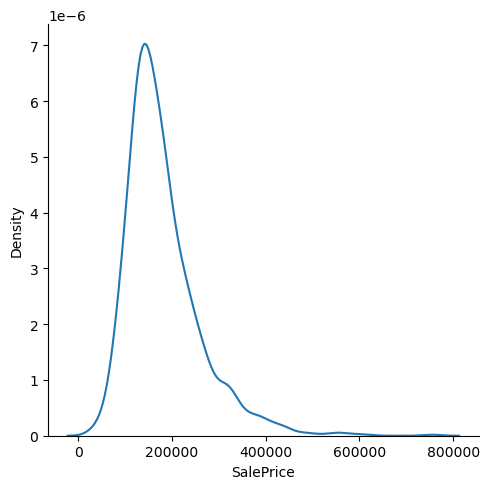

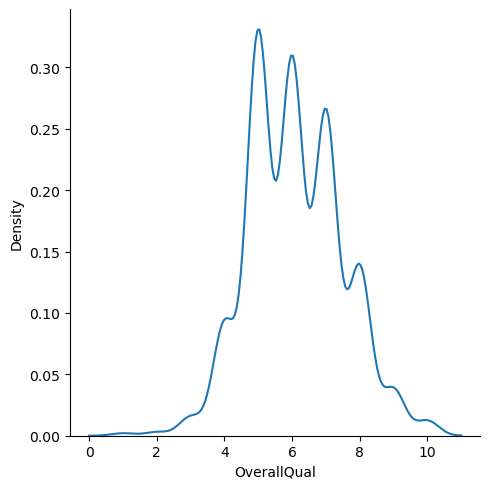

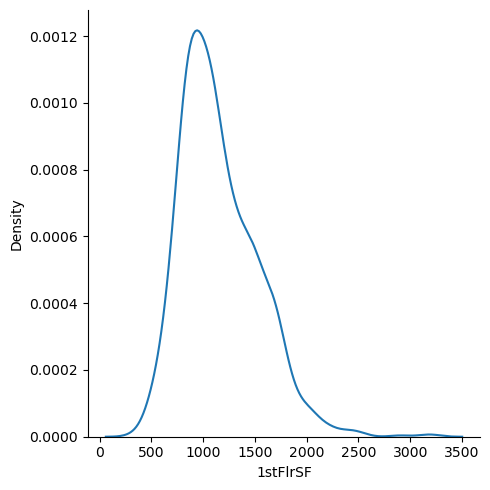

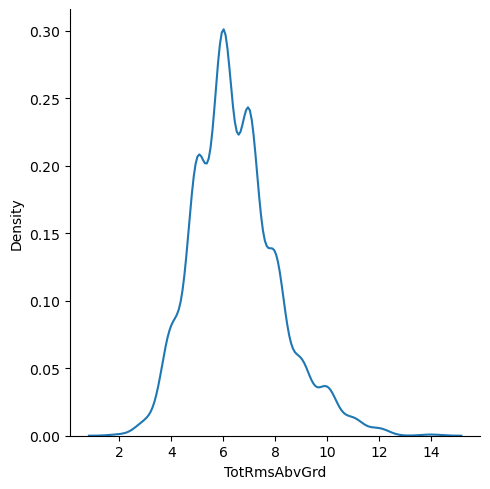

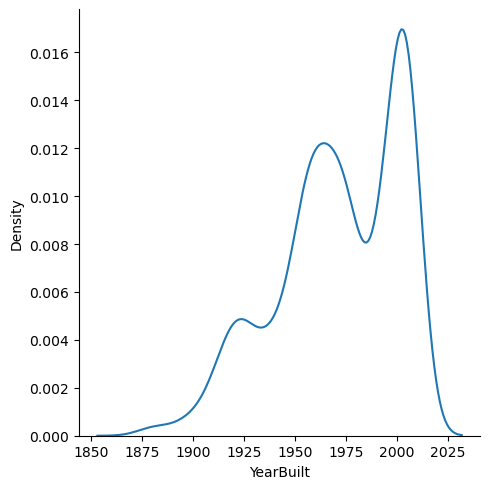

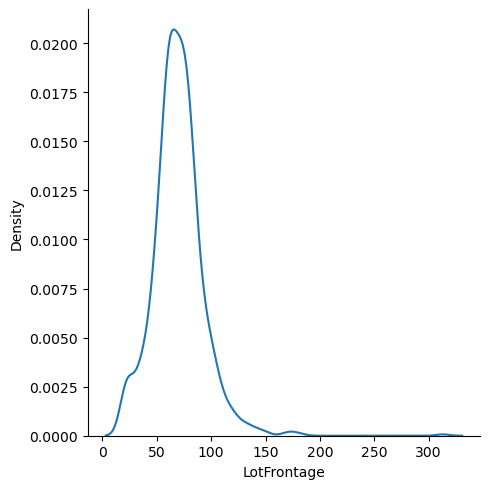

In [48]:
displayGraphics(df_t)

## OBTENER COEFICIENTE DE CORRELACION

In [49]:
df_t.corr()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.793990,0.616289,0.564707,0.534171,0.363292
OverallQual,0.793990,1.000000,0.469411,0.444293,0.567313,0.242420
1stFlrSF,0.616289,0.469411,1.000000,0.409318,0.292074,0.417388
TotRmsAbvGrd,0.564707,0.444293,0.409318,1.000000,0.122911,0.341005
YearBuilt,0.534171,0.567313,0.292074,0.122911,1.000000,0.121474
LotFrontage,0.363292,0.242420,0.417388,0.341005,0.121474,1.000000


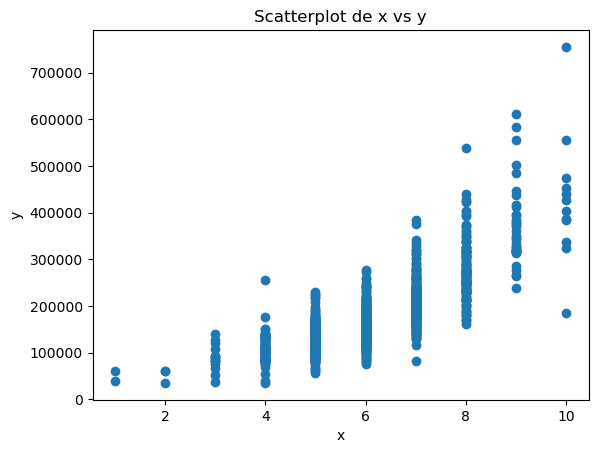

In [51]:
plt.scatter(df_t['OverallQual'], df_t['SalePrice'])
plt.title('Scatterplot de x vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()